In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

In [2]:
train = pd.read_csv(r"..\data\train.csv")
test = pd.read_csv(r"..\data\test.csv")

In [3]:
X = train.drop(columns = ["label"])
y = train.loc[:, "label"]

In [4]:
X_train, X_valid, y_train, y_valid = \
    train_test_split(X, y, stratify=y, train_size=0.75)

In [5]:
input_shape = (28, 28, 1)

In [6]:
num_classes = 10

In [7]:
model = keras.Sequential([
    layers.Input(shape = input_shape),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

In [8]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [9]:
early_stopping = keras.callbacks.EarlyStopping(
    patience=5,
    min_delta=0.001,
    restore_best_weights=True,
)

In [10]:
X_train_array = X_train.values
X_valid_array = X_valid.values

In [11]:
X_train_reshaped = X_train_array.reshape(-1, 28, 28, 1)
X_valid_reshaped = X_valid_array.reshape(-1, 28, 28, 1)

Epoch 1/200
62/62 ━━━━━━━━━━━━━━━━━━━━ 9s 115ms/step - accuracy: 0.5065 - loss: 6.7040 - val_accuracy: 0.8952 - val_loss: 0.3401
Epoch 2/200
62/62 ━━━━━━━━━━━━━━━━━━━━ 7s 107ms/step - accuracy: 0.9139 - loss: 0.2839 - val_accuracy: 0.9466 - val_loss: 0.1839
Epoch 3/200
62/62 ━━━━━━━━━━━━━━━━━━━━ 6s 100ms/step - accuracy: 0.9524 - loss: 0.1532 - val_accuracy: 0.9600 - val_loss: 0.1376
Epoch 4/200
62/62 ━━━━━━━━━━━━━━━━━━━━ 6s 102ms/step - accuracy: 0.9703 - loss: 0.0928 - val_accuracy: 0.9677 - val_loss: 0.1152
Epoch 5/200
62/62 ━━━━━━━━━━━━━━━━━━━━ 6s 100ms/step - accuracy: 0.9781 - loss: 0.0678 - val_accuracy: 0.9688 - val_loss: 0.1070
Epoch 6/200
62/62 ━━━━━━━━━━━━━━━━━━━━ 6s 101ms/step - accuracy: 0.9841 - loss: 0.0501 - val_accuracy: 0.9745 - val_loss: 0.0881
Epoch 7/200
62/62 ━━━━━━━━━━━━━━━━━━━━ 6s 99ms/step - accuracy: 0.9883 - loss: 0.0363 - val_accuracy: 0.9750 - val_loss: 0.0918
Epoch 8/200
62/62 ━━━━━━━━━━━━━━━━━━━━ 7s 118ms/step - accuracy: 0.9904 - loss: 0.0294 - val_accur

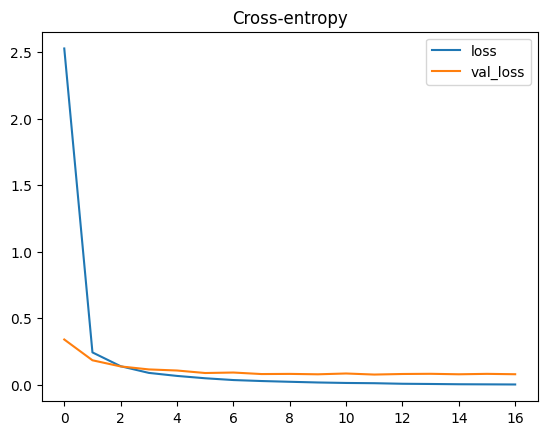

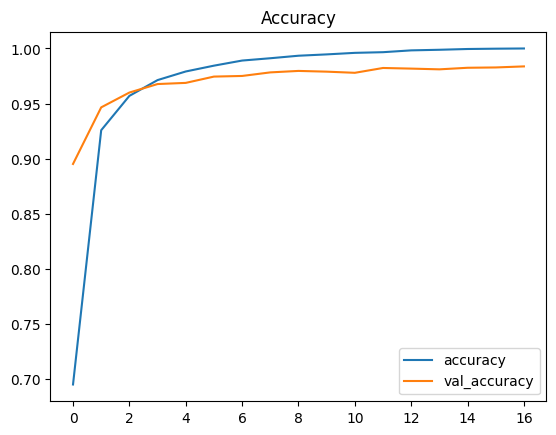

In [12]:
history = model.fit(
    X_train_reshaped, y_train,
    validation_data=(X_valid_reshaped, y_valid),
    batch_size=512,
    epochs=200,
    callbacks=[early_stopping],
)

history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot(title="Cross-entropy")
history_df.loc[:, ['accuracy', 'val_accuracy']].plot(title="Accuracy");

In [13]:
test_array = test.values

In [14]:
test_reshaped = test_array.reshape(-1, 28, 28, 1)

In [15]:
predictions = model.predict(test_reshaped)

875/875 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step


In [16]:
predicted_labels = np.argmax(predictions, axis=1)

In [17]:
my_submission2 = pd.DataFrame({'ImageId': range(1, 28001), 'Label': predicted_labels})
my_submission2.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,7
4,5,3


In [18]:
my_submission2.to_csv("../results/tensorflow2.csv", index=False)